<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h1>Advanced Data Analytics - Time Series Modeling</h1>
<h2>Part I: Research Question</h2>
<h3>A. Purpose of Analysis</h3>
<h4>1. Research Question</h4>
<p>&nbsp; &nbsp; This data analysis will attempt to answer the following question: Using a time series
model technique, what are the forecasted earnings for the next business quarter?</p>
<h4>2. Objectives or Goals</h4>
<p>&nbsp; &nbsp; The goal of the data analysis is to create a time series model with the most possible
accuracy that accounts for any noticeable patterns or trends in the data. After having
accomplished that, the next goal is to use that time series to predict the next quarter’s (90
days) revenue.</p>

<h2>Part II: Method Justification</h2>
<h3>B. Summary of Assumptions</h3>
<p>&nbsp; &nbsp; Many time series models, ARIMA and SARIMA for instance, require stationarity.
Stationarity is present in a time series model when the “mean, variance and
autocorrelation – remain unwavering over time" (Tate, 2023). In other words, the data needs
to be steady or you run the risk of “unreliable model outputs and inaccurate predictions”
(Tate, 2023). The assumption of stationarity leads to better models and improved forecasts.

&nbsp; &nbsp; Autocorrelated data is the relationship between the current values of data point and
the past, or lagged values of this data point. Regression analysis, such as the ARIMA model
that will be used, operates under the assumption of “independence of observations”
meaning that there can be no autocorrelation in the data’s residuals (Smith, 2024).

&nbsp; &nbsp; Additional assumptions of time series include the requirement of linear
relationships in data points and the absence of outliers.</p>

<h2>Part III: Data Preparation</h2>
<h3>C. A Summary of the Data Cleaning Process</h3>
<h4>1. Line Graph Visualization</h4>


-- Begin Data Analytics --



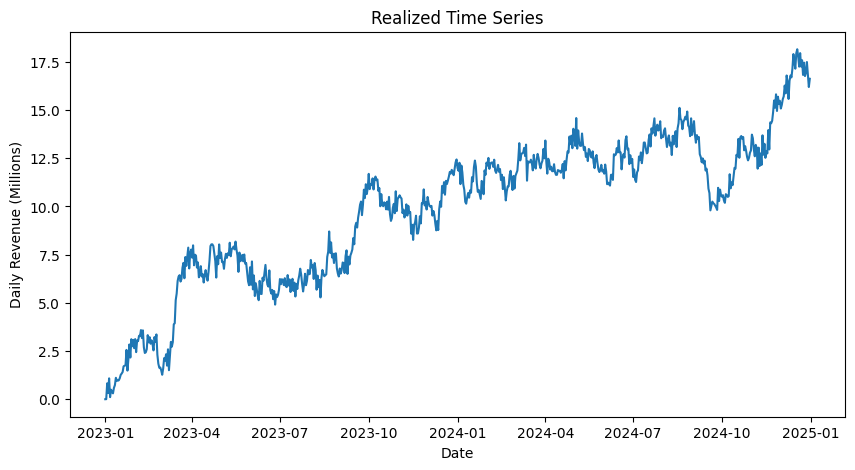

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

class text:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

df = pd.read_csv('teleco_time_series .csv')
# aligns the df index to match the index of Day so df[0] doesn't exist
df.index = df.index + 1

# region Data Overview
# set date range [In-Text Citation: (NumFOCUS Inc, n.d.)]
def plot_time_series(title, x, y, y_axis=None):
   """
   plot_time_series: plots the linear graph of a time series or differentiated time series.
   """
   plt.figure(figsize=(10, 5)) 
   plt.plot(x, y)
   plt.title(title)
   plt.xlabel('Date')
   if y_axis is not None:
      plt.ylabel(y_axis)
   plt.show()
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.drop(columns='Day', inplace=True)
df = df.reindex(columns=['Date', 'Revenue'])

print (text.BOLD + "\n-- Begin Data Analytics --\n" + text.END)
# plot the realized time series
plot_time_series('Realized Time Series', df['Date'], df['Revenue'], 'Daily Revenue (Millions)')

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>2. Time Step Formatting</h4>
<p>&nbsp; &nbsp; The time step formatting of the realization is the revenue in millions for every day
over the course of 731 days. There are no gaps within this sequence of time. This period is
mapped to the time range of January 1st, 2023 to December 31st, 2024 for better
organization and to account for the variation of days in each month.</p>
<h4>3. Stationarity</h4>
<p>&nbsp; &nbsp; Just looking at the above chart there is an upwards trend which indicates the lack of
stationarity. Using the Augmented Dickey-Fuller Test, the p-value is 0.321 which is greater
than the alpha value of 0.05. Since the p-value is greater, the time series is nonstationary
as it fails to reject the null hypothesis (Bobbitt, 2021).</p>

In [5]:
def adf_test(col):
   """
   adf_test: calculates the Augmented Dickey Fuller test for the passed column
   """
   # adf test [In-Text Citation: (GeeksforGeeks, 2022)]
   adf_results = adfuller(col)
   alpha = 0.05
   print("Augmented Dickey Fuller Test")
   print(f"ADF Stat: {adf_results[0]}")
   print(f"p-value: {adf_results[1]}")
   print('Critical Values:')
   for k, v in adf_results[4].items():
      print('\t%s: %.3f' % (k, v))
   if adf_results[1] <= alpha:
      print("\nThe time series is " + text.BOLD +  "stationary" + text.END + " since the p-value is less than or equal to 0.05")
   else:
      print("\nThe time series is " + text.BOLD +  "nonstationary" + text.END + " since the p-value is greater than 0.05")
# adf for the original data
adf_test(df['Revenue'])

Augmented Dickey Fuller Test
ADF Stat: -1.924612157310181
p-value: 0.3205728150793977
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569

The time series is nonstationary since the p-value is greater than 0.05


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>4. Steps to Prepare the Data</h4>
<p>&nbsp; &nbsp; To prepare the data for a time series analysis I began by creating a new data frame.
While creating this new data frame I also differentiated the ‘Revenue’ value time series in
an effort to add stationarity to the time series.</p>

In [7]:
# region Prepare the Data
stationary_df = pd.DataFrame(data={
   'Date': df['Date'],
   'Revenue': df['Revenue'].diff()
   })

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Differentiating a data frame “calculates the difference” of the previous value of a
variable to the next or current value (Rosidi, n.d.). With this in mind, the first row of the data
must be removed as there is no value present after differentiating. Additionally, I set the
date values as the index of ‘stationary_df’ and specified the frequency to work better with
the ‘seasonal_decompose’ function.</p>

In [8]:
# set index/frequency for seasonal_decompose function [In-Text Citation: (Snow & jezrael, 2019)]
stationary_df = stationary_df.set_index(df['Date']).asfreq('d')
# remove 1st row
stationary_df = stationary_df.iloc[1:, :]

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Now with the data differentiated I again display the time series as a line graph and
perform an Augmented Dickey-Fuller Test to test for stationarity.</p>

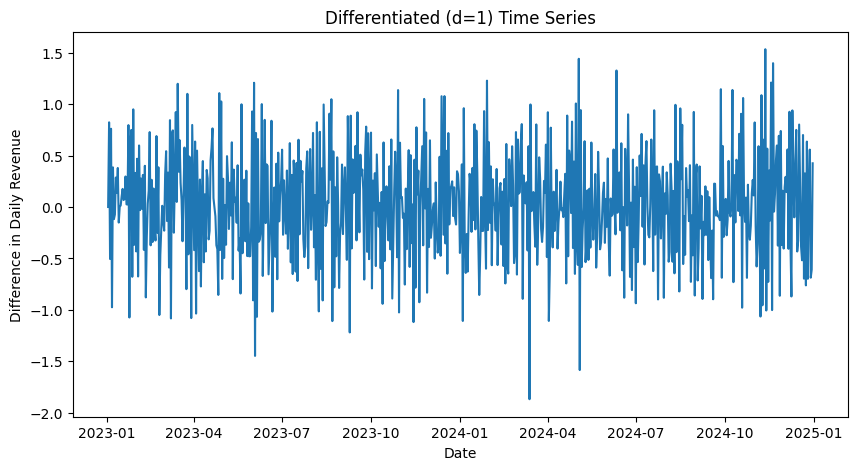


Differentiating Data
Augmented Dickey Fuller Test
ADF Stat: -44.874527193876
p-value: 0.0
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569

The time series is stationary since the p-value is less than or equal to 0.05


In [11]:
# check stationarity again
plot_time_series('Differentiated (d=1) Time Series', stationary_df['Date'], stationary_df['Revenue'], 'Difference in Daily Revenue')
print(text.UNDERLINE + "\nDifferentiating Data" + text.END)
# adf for the differentiated data
adf_test(stationary_df['Revenue'])

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; Visually, the graph suits the stationarity requirements and the Augmented Dickey-
Fuller Test confirms it with a p-value below 0.05.
For the final step, I split the original data frame into training and testing data with
80% of the values (January 1st, 2023 to August 6th, 2024) belonging to the training set. The
final 146 values are in the testing set which will be used to compare the model’s predicted
values with actual values in the same time span.</p>

In [12]:
#split Data
train = df.iloc[:584]
test = df.iloc[584:]

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>5. Prepared Data Set</h4>
<p>&nbsp; &nbsp; The cleaned data set can be found in three provided files. ‘prepared_data.csv’
contains all of the cleaned and prepared values before they are split and ‘train.csv’ and
‘test.csv’ contain training and testing values respectively.</p>

In [13]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index= False)
stationary_df.to_csv('prepared_data.csv', index= False)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h2>Part IV: Model Identification and Analysis</h2>
<h3>D. Analyzing the Time Series Data</h3>
<h4>1. Report Findings and Visualizations</h4>
<p>&nbsp; &nbsp; The following graphs and analyses were conducted on differentiated data, not the
original data set.

<i>&nbsp; &nbsp; Seasonality</i>
</p>

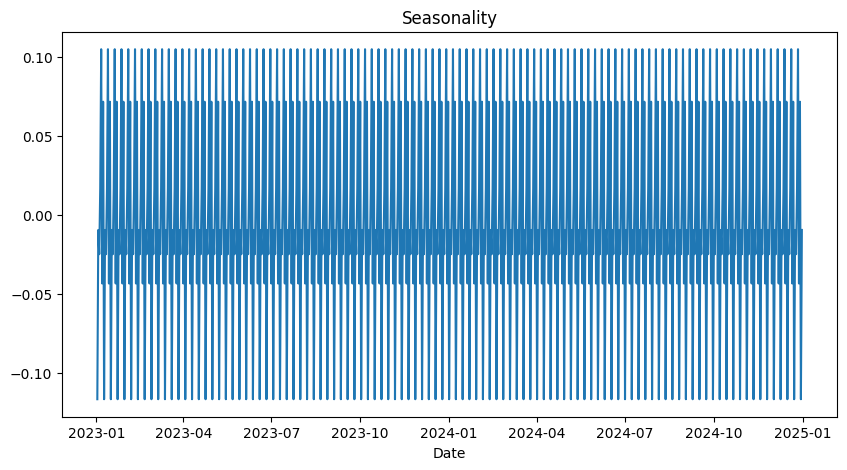

In [14]:
# seasonal decomposition [In-Text Citation: (Hayes, 2021)]
decompose_result = seasonal_decompose(stationary_df['Revenue'])
plot_time_series('Seasonality', stationary_df['Date'], decompose_result.seasonal)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The repetitive pattern of the graph indicates seasonality present. Zooming into the graph
shows a seasonality of seven days.

<i>&nbsp; &nbsp; Trends</i>
</p>

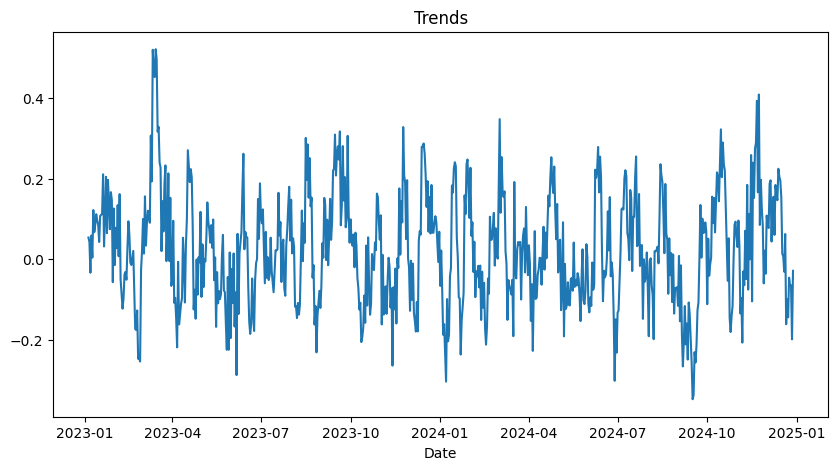

In [15]:
plot_time_series('Trends', stationary_df['Date'], decompose_result.trend)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; There is no clear upwards or downwards direction of the trend graph so the trend of
the differentiated data is stable. This trending differs from the actual data which has an
upwards trend visible in C1.

<i>&nbsp; &nbsp; Autocorrelation and Partial Autocorrelation</i>
</p>

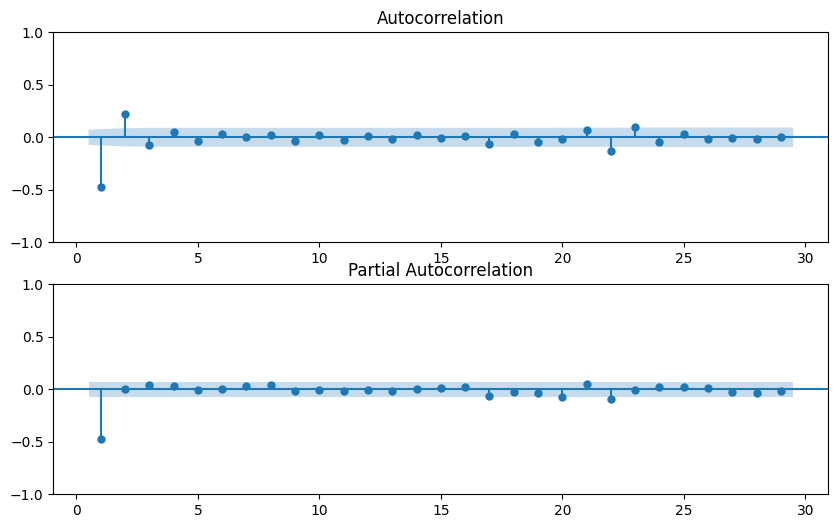

In [16]:
# acf and pacf [In-Text Citation: (Brownlee, 2020)]
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 6)
plot_acf(stationary_df['Revenue'], ax=axs[0], zero=False)
plot_pacf(stationary_df['Revenue'], ax=axs[1], zero=False)
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; ACF graph on top cuts off at two and the PACF graph on the bottom cuts off at one.
This is important information that will be used to consider the best ARIMA model since the
PACF and ACF hint towards the values of p and q respectively (Aly, n.d.).

<i>&nbsp; &nbsp; Power Spectral Density</i>
</p>

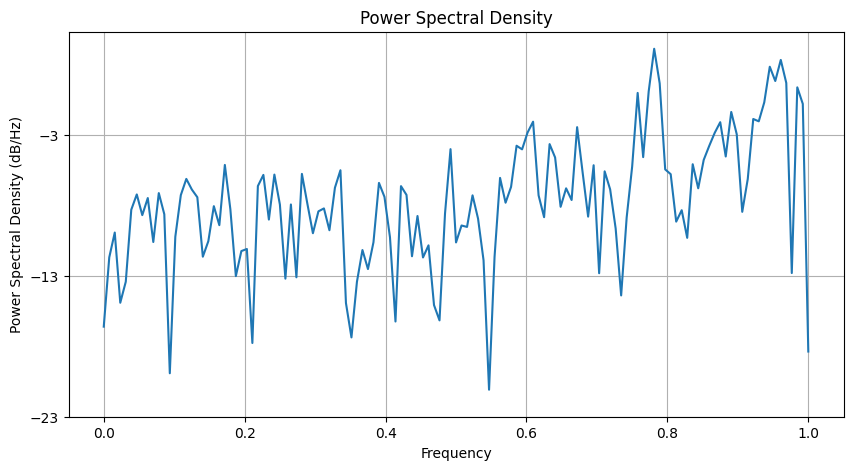

In [17]:
# spectral density [In-Text Citation: (Matplotlib Development Team, n.d.)]
plt.figure(figsize=(10, 5)) 
plt.title('Power Spectral Density')
plt.psd(stationary_df['Revenue'])
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The power spectral density graph indicates there is some form of seasonality
present, which is demonstrated by the above seasonality graph.

<i>&nbsp; &nbsp; Decomposed Time Series</i>
</p>

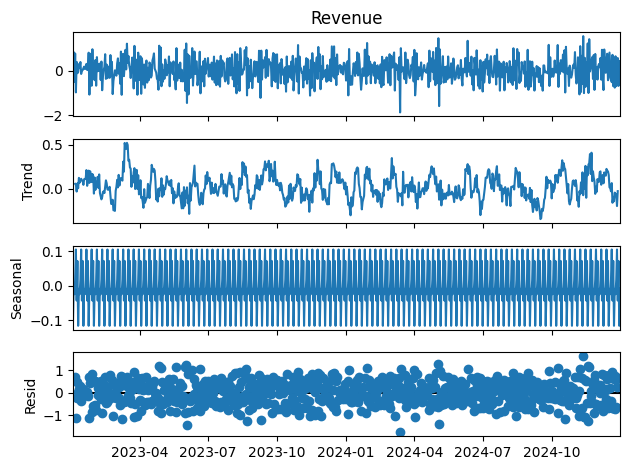

In [18]:
# decomposed time series
decompose_result.plot()
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The decomposed time series graphs are the same graphs show above with the realized
differentiated time series and the residuals plot.

<i>&nbsp; &nbsp; Lack of Trends in the Residuals</i>
</p>

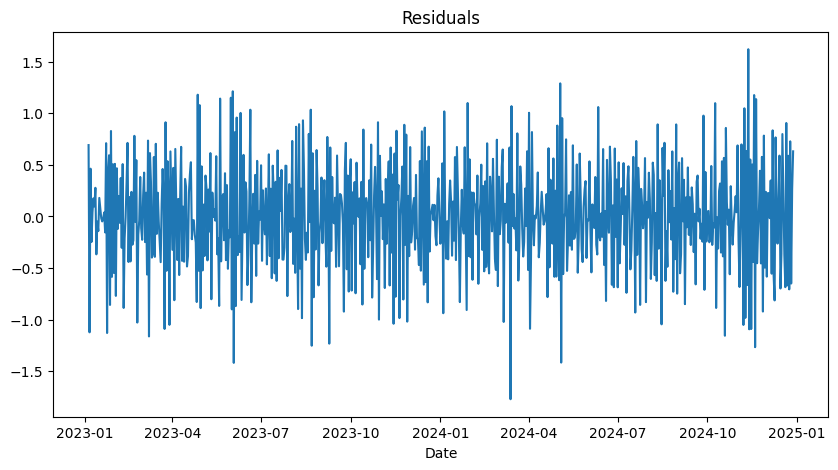

In [19]:
# confirmation of lack of trends
plot_time_series('Residuals', stationary_df['Date'], decompose_result.resid)

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The plot of the residuals shows no present trend as the values fluctuate around
zero.</p>
<h4>2. ARIMA Model</h4>
<p>&nbsp; &nbsp; To create the best possible model I will use the ‘auto_arima’ function from the
‘pmdarima.arima’ library. This function calculates several ARIMA models and finds the
model with the best AIC score. Additionally, ‘auto_arima’ can also take seasonality into
consideration when optimizing the model making it an incredible tool well suited for this
project.</p>

In [20]:
# Build ARIMA
print(text.UNDERLINE + "\nTesting ARIMA Models" + text.END)
# use auto arima to test best model [In-Text Citation: (Pulagam, 2020)]
best_model = auto_arima(train['Revenue'], trace=True, suppress_warnings=True)
print('\n')


Testing ARIMA Models
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=776.988, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=910.148, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=773.046, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=798.905, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=909.276, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=775.043, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=775.043, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=776.811, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=774.035, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.793 seconds




<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The best resulting model from testing with an estimated AIC of 774.035 is where the
order is (1,1,0), the seasonality order is (0,0,0)[0], and there is an intercept present.
Because all seasonality values are zero, an ARIMA(1,1,0) model will be used. Additionally,
the model will be configured with a linear trend as the original data has an upwards trend.
This trend is the intercept (x1 in the picture below) derived from model testing. The resulting
model has an AIC of 773.046 which is better than the estimated amount.</p>

In [21]:
# trend is t because original data has an upwards trend [In-Text Citation: (Vidal & Alien, 2021)]
arima_model = ARIMA(train['Revenue'], order=(best_model.order), trend='t').fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -383.523
Date:                Fri, 25 Jul 2025   AIC                            773.046
Time:                        11:47:11   BIC                            786.151
Sample:                             0   HQIC                           778.154
                                - 584                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0230      0.013      1.727      0.084      -0.003       0.049
ar.L1         -0.4605      0.036    -12.663      0.000      -0.532      -0.389
sigma2         0.2181      0.014     16.020      0.0

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>3. Forecasting Using ARIMA Model</h4>
<p>&nbsp; &nbsp; Since section E2 already requires the forecast of the testing data set, this section
will be presenting a forecast that relates to the question posed in A1, “What are the
forecasted earnings for the next business quarter?”. Here is the resulting forecast:</p>


Forecasting ARIMA Models
Final Values:
          Date    Revenue
818 2025-03-29  18.750555
819 2025-03-30  18.773511
820 2025-03-31  18.796466


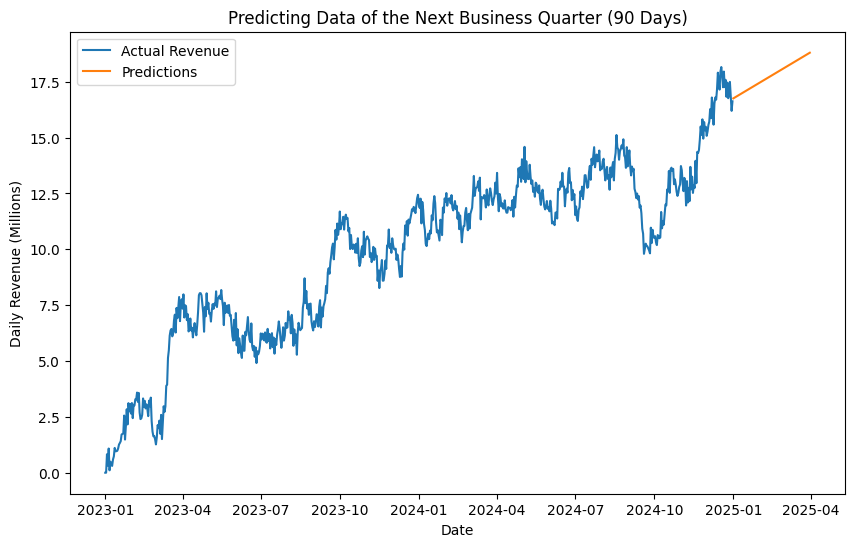

In [24]:
# region Forecasting
print(text.UNDERLINE + "\nForecasting ARIMA Models" + text.END)
# compare against test data [In-Text Citation: (GeeksforGeeks, 2020)]
start = len(train) 
end = len(train) + len(test) - 1
test_predictions = arima_model.predict(start, end,)
# compare for 90 days from end (237 from end of train)
predictions = pd.DataFrame({
   'Date': pd.date_range(start='2025-01-01', periods=90, freq='d'),
   'Revenue': arima_model.predict(end, end+89)
})
print("Final Values:")
print(predictions.tail(3))
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Revenue'], label='Actual Revenue')
plt.plot(predictions['Date'], predictions['Revenue'], label='Predictions')
plt.title('Predicting Data of the Next Business Quarter (90 Days)')
plt.ylabel('Daily Revenue (Millions)')
plt.xlabel('Date')
plt.legend()
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<h4>4. Output and Calculations</h4>
<p>&nbsp; &nbsp; The output and calculations have been provided in the above pictures. For further
detail see the attached python file.</p>

<h2>Part V: Data Summary and Implications</h2>
<h3>E. A Summary of Findings and Assumptions</h3>
<h4>1. Results</h4>
<p><i>Selection of ARIMA Model</i>

&nbsp; &nbsp; Having created a graph for the PACF and the ACF, I could already estimate that p
would be one or below and q would be two or below. To further investigate this, I ran the
‘auto_arima’ function which finds the ARIMA model with the best values while accounting
for any seasonality and trends that could be present in the data set. The results indicated
that the best model is ARIMA(1,1,0) with an intercept included. This intercept is explained
as the upwards trend of the time series. Despite seasonality being present in the dataset,
this model which does not account for seasonality had the best score compared to other
models with an AIC value of 773.046.

<i>Prediction Interval of the Forecast</i>

&nbsp; &nbsp; The forecast from D3 accounts for the 90 days after the end of the original data set,
namely January 1st, 2025, to March 31st, 2025.


<i>Justification of the Forecast Length</i>

&nbsp; &nbsp; The question posed at the beginning of this analysis was whether revenue could be
predicted for the next business quarter. A business quarter is approximately three months
or 90 days.


<i>Model Evaluation and Error Metric</i>

&nbsp; &nbsp; To evaluate the model, I compared the actual data derived from the test data set to
the predicted data from the same time period (visualized in the next section) through three
metrics:
</p>

In [25]:
# region Evaluate Model
print(text.UNDERLINE + "\nEvaluating ARIMA Models" + text.END)
test = test.copy()
test['forecast_error'] = test['Revenue'] - test_predictions
test['abs_percent_error'] = (test['forecast_error'].abs() / test['Revenue']) * 100
mape = test['abs_percent_error'].mean()
mae = mean_absolute_error(test['Revenue'], test_predictions)
rmse = root_mean_squared_error(test['Revenue'], test_predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape.round(3)}")
print(f"Mean Absolute Error (MAE): {mae.round(3)}")
print(f"Root Mean Squared Error (RMSE): {rmse.round(3)}")


Evaluating ARIMA Models
Mean Absolute Percentage Error (MAPE): 15.109
Mean Absolute Error (MAE): 1.815
Root Mean Squared Error (RMSE): 2.295


<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>&nbsp; &nbsp; The Mean Absolute Percentage Error calculates the average difference between
actual values and predicted values as a percentage which in this analysis resulted in
15.109% difference in values. This amount is not insignificant, but it isn’t terribly high so
the model could be considered decent or good by this standard.

&nbsp; &nbsp; Mean Absolute Error is an amount “indicat[ing] the average absolute error between
predicted and actual values” so values that are small and close to zero, like the 1.815
calculated from this model, point to a good fitting model (Ahmed, 2023).

&nbsp; &nbsp; The last metric Root Mean Squared Error is similar to Mean Absolute Error in that it
measures the difference in predicted values and actual values by squaring the difference,
finding the average, then finding the square root of said average. The smaller the number in
this metric the better the model. Having a score of 2.295 is considerably small so this
model is decent.

&nbsp; &nbsp; As displayed by all metrics, this ARIMA model is a good fit for prediction.</p>
<h4>2. Annotated Visualization</h4>
<p>&nbsp; &nbsp; Having created the model with the training data, I will forecast the values of the
testing data which ranges from August 7th, 2024 to December 31st, 2024.</p>

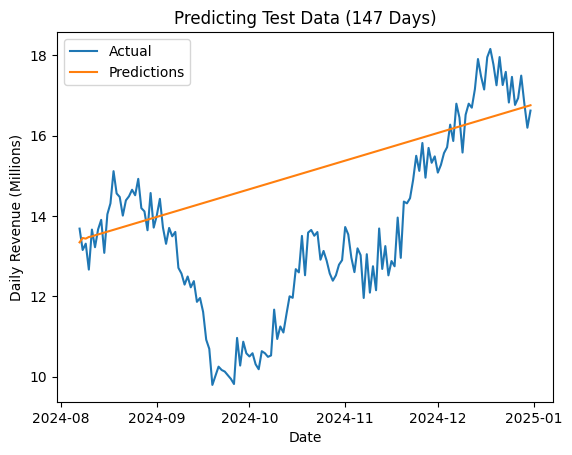

In [26]:
# plot predictions and actual values 
plt.plot(test['Date'], test['Revenue'], label='Actual')
plt.plot(test['Date'], test_predictions, label='Predictions')
plt.title('Predicting Test Data (147 Days)')
plt.ylabel('Daily Revenue (Millions)')
plt.xlabel('Date')
plt.legend()
plt.show()

<style type="text/css">
    h1,h2,h3,h4{
        margin-bottom: 0px;
    }
    p,ul{
        margin-bottom: 20px;
    }
    h2{
        margin-left: 10px;
        margin-top: 15px;
    }
    h3{
        margin-left: 20px;
        margin-top: 10px;
    }
    h4{
        margin-left: 30px;
        margin-top: 10px;
    }
    p{
        margin-left: 40px;
        margin-top: 7px;
    }
    li{
        margin-left: 40px;
        margin-top: 5px;
    }
</style>
<p>The predicted values successfully capture the upwards trend in the time series and
the starting and ending values are very close together.</p>
<h4>3. Recommendation</h4>
<p>&nbsp; &nbsp; The revenue is expected to continue upwards rounding out the next quarter with
about 18.80 million dollars as seen in the graph of D3. Given this result, I would
recommend the business to continue operating by their typical standards while also
continuing to update their predictive models. By continuously developing these models the
business can determine the best time to switch strategies in times of potential downturn or
maintain current strategies when revenue is positively responsive such as the outcome
predicted by this analysis.</p>
<h2>Part VI: Attachments</h2>
<h3>F. Sources For Third-Party Code</h3>
<p>Brownlee, J. (2020, August 14). A Gentle Introduction to Autocorrelation and Partial
Autocorrelation. Machine Learning Mastery.
<a href="https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/">https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/</a>

GeeksforGeeks. (2020, February 19). Python | ARIMA model for Time Series Forecasting.
GeeksforGeeks. https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

GeeksforGeeks. (2022, January 13). How to Check if Time Series Data is Stationary with
Python? GeeksforGeeks. https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/

Hayes, S. (2021, June 7). Finding Seasonal Trends in Time-Series Data with Python.
Towards Data Science. https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861/

Matplotlib Development Team. (n.d.). matplotlib.pyplot.psd. Matplotlib.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html

NumFOCUS Inc. (n.d.). pandas.date_range — pandas 2.2.3 documentation. Pandas.
https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

Pulagam, S. (2020, June 26). Time Series forecasting using Auto ARIMA in python. Medium.
https://medium.com/data-science/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

Snow, C. & jezrael. (2019, February 11). How to set frequency with pd.to_datetime()? Stack
Overflow. https://stackoverflow.com/questions/54630027/how-to-set-frequency-with-pd-to-datetime?rq=1

Vidal & Alien. (2021, July 28). How to include the constant/intercept when fitting SARIMA
model in python. Stack Overflow.
https://stackoverflow.com/questions/68553957/how-to-include-the-constant-intercept-when-fitting-sarima-model-in-python</p>
<h3>G. Sources</h3>
<p>Ahmed, M. W. (2023, August 24). Understanding mean Absolute error (MAE) in Regression:
A Practical guide. Medium.
<a href="https://medium.com/@m.waqar.ahmed/understanding-mean-absolute-error-mae-in-regression-a-practical-guide-26e80ebb97df">https://medium.com/@m.waqar.ahmed/understanding-mean-absolute-error-mae-in-regression-a-practical-guide-26e80ebb97df</a>

Aly, S. (n.d.). “what is p d q in ARIMA?”. Western Governor’s University.
https://westerngovernorsuniversity-my.sharepoint.com/:w:/g/personal/sherin_aly_wgu_edu/EeRQaOnkstRLjY_vUUQV7FsBi2J_VFKBlGfj0IXGCeF_yQ?e=oC3vAd&wdLOR=cA5613721-ECF0-4858-8410-11FB0CF0A48D

Bobbitt, Z. (2021, May 25). Augmented Dickey-Fuller Test in Python (With example).
Statology. https://www.statology.org/dickey-fuller-test-python/

Rosidi, N. (n.d.). Understanding the Pandas diff() Function: A Guide for Data Analysts.
StrataScratch. https://www.stratascratch.com/blog/understanding-the-pandas-diff-function-a-guide-for-data-analysts/

Smith, T. (2024, September 10). Autocorrelation: What It Is, How It Works, Tests.
Investopedia. https://www.investopedia.com/terms/a/autocorrelation.asp

Tate, A. (2023, December 1). Understanding the Importance of Stationarity in Time Series.
Hex. https://hex.tech/blog/stationarity-in-time-series/</p>